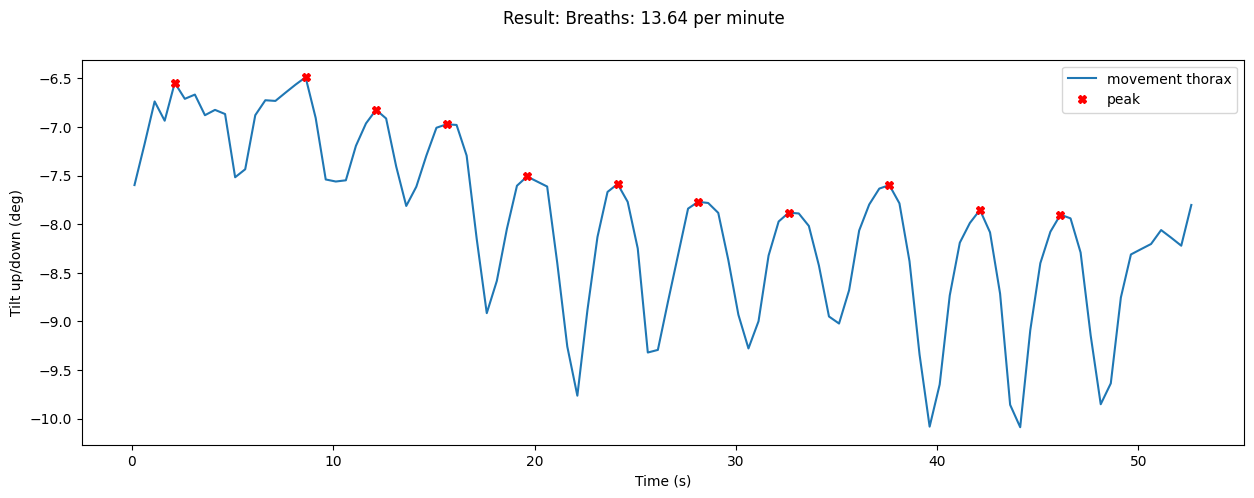

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read file
data = pd.read_csv('V6_Flat.csv')

#Werte aus der CSV-Datei extrahieren
time_series = data['t']
up_down = data['Tilt up/down (deg)']

#Peaks finden
peaks, _ = find_peaks(up_down,  height=-8, distance=5)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Breaths: {breaths:.2f} per minute')

ax1.plot(time_series, up_down, label='movement thorax')
ax1.plot(time_series[peaks], up_down[peaks], 'X', label='peak', color='red')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Tilt up/down (deg)')
ax1.legend()

# Diagramm anzeigen
plt.show()